In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import datetime as dt
from datetime import datetime
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
item_name = "Winter Offensive Weapon Case" #@param ["Horizon case", "Spectrum 2 Case", "Operation Hydra Case", "Spectrum Case", "Glove Case", "Gamma 2 Case", "Gamma Case", "Chroma 3 Case", "Operation Wildfire Case", "Revolver Case", "Shadow Case", "Falchion Case", "Chroma 2 Case", "Chroma Case", "Operation Vanguard Weapon Case", "Operation Breakout Weapon Case", "Huntsman Weapon Case", "Operation Phoenix Weapon Case", "Winter Offensive Weapon Case", "Prisma 2 Case", "Chicken Capsule", "Prisma Case", "Danger Zone Case", "Sticker Capsule 2", "Sticker Capsule", "Snakebite Case", "Operation Broken Fang Case", "Fracture Case", "Shattered Web Case", "Clutch Case"]

In [3]:
name='/content/drive/MyDrive/College_Project/Steam_scrapper/Database_of_items_price/'+item_name+'.csv'
item=pd.read_csv('/content/drive/MyDrive/College_Project/Steam_scrapper/Database_of_items_price/Winter Offensive Weapon Case.csv')

In [4]:
item.tail(3)

,Date,Price,Quatity Sold
3522,Sep 06 2021 10: +0,4.732,5
3523,Sep 06 2021 11: +0,4.994,15
3524,Sep 06 2021 12: +0,4.340,23


##Data Preprocessing

In [5]:
## function to filter only date from the string and return 
def filterdate(s):
  s=s.split()
  date_str=' '.join([s[0],s[1],s[2]])
  return datetime.strptime(date_str, '%b %d %Y').date()


In [6]:
item['Date'] = item['Date'].apply(filterdate)
item.head()

,Date,Price,Quatity Sold
0,2013-12-19,6.930,11433
1,2013-12-20,4.273,14869
2,2013-12-21,3.352,15204
3,2013-12-22,2.689,16540
4,2013-12-23,2.353,17821


In [7]:
print(item.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3525 non-null   object 
 1   Price         3525 non-null   float64
 2   Quatity Sold  3525 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 82.7+ KB
None


In [8]:
item.describe()

,Price,Quatity Sold
count,3525.000000,3525.000000
mean,2.123794,3680.654468
std,1.531393,9195.167959
min,0.053000,1.000000
25%,0.954000,225.000000
50%,1.504000,400.000000
75%,3.871000,933.000000
max,7.084000,65889.000000


In [9]:
bool_series = pd.isnull(item['Price'])
print(item[bool_series])
bool_series=pd.isnull(item['Quatity Sold'])
print(item[bool_series])
bool_series=pd.isnull(item['Date'])
print(item[bool_series])
#checking null values in the dataset, there is no null value

Empty DataFrame
Columns: [Date, Price, Quatity Sold]
Index: []
Empty DataFrame
Columns: [Date, Price, Quatity Sold]
Index: []
Empty DataFrame
Columns: [Date, Price, Quatity Sold]
Index: []


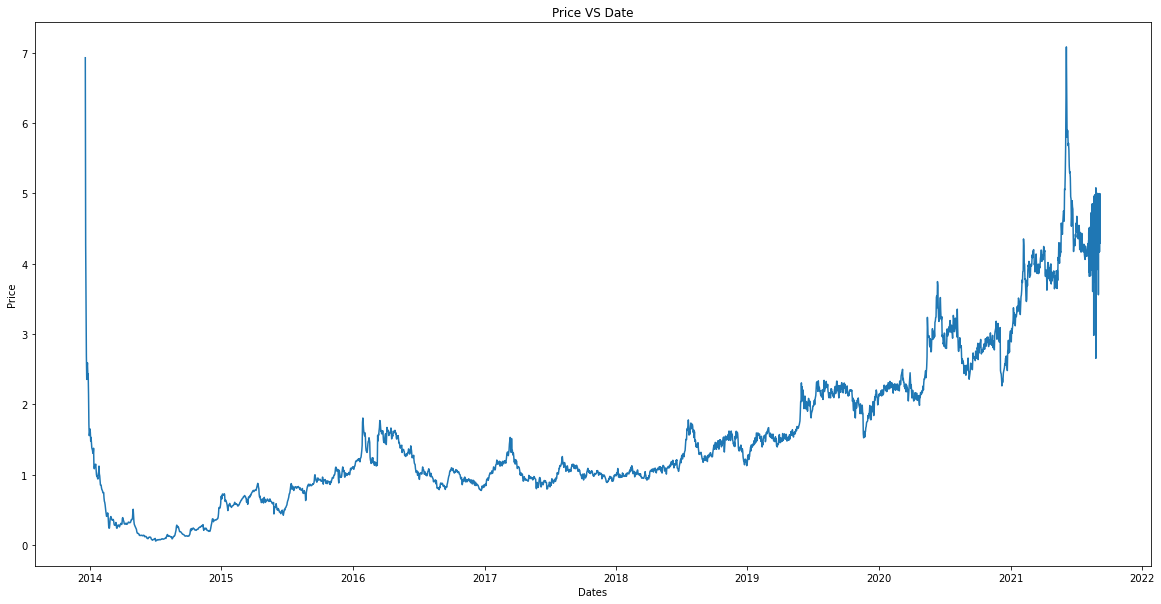

In [10]:
plt.figure(figsize=(20,10))
plt.title('Price VS Date')
plt.xlabel('Dates')
plt.ylabel('Price')
plt.plot(item['Date'], item['Price'])
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7452a05e50>,
      dtype=object)

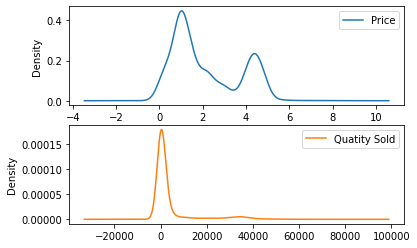

In [11]:
#Density plots
item[['Price', 'Quatity Sold']].plot(kind='density', subplots=True, sharex=False)


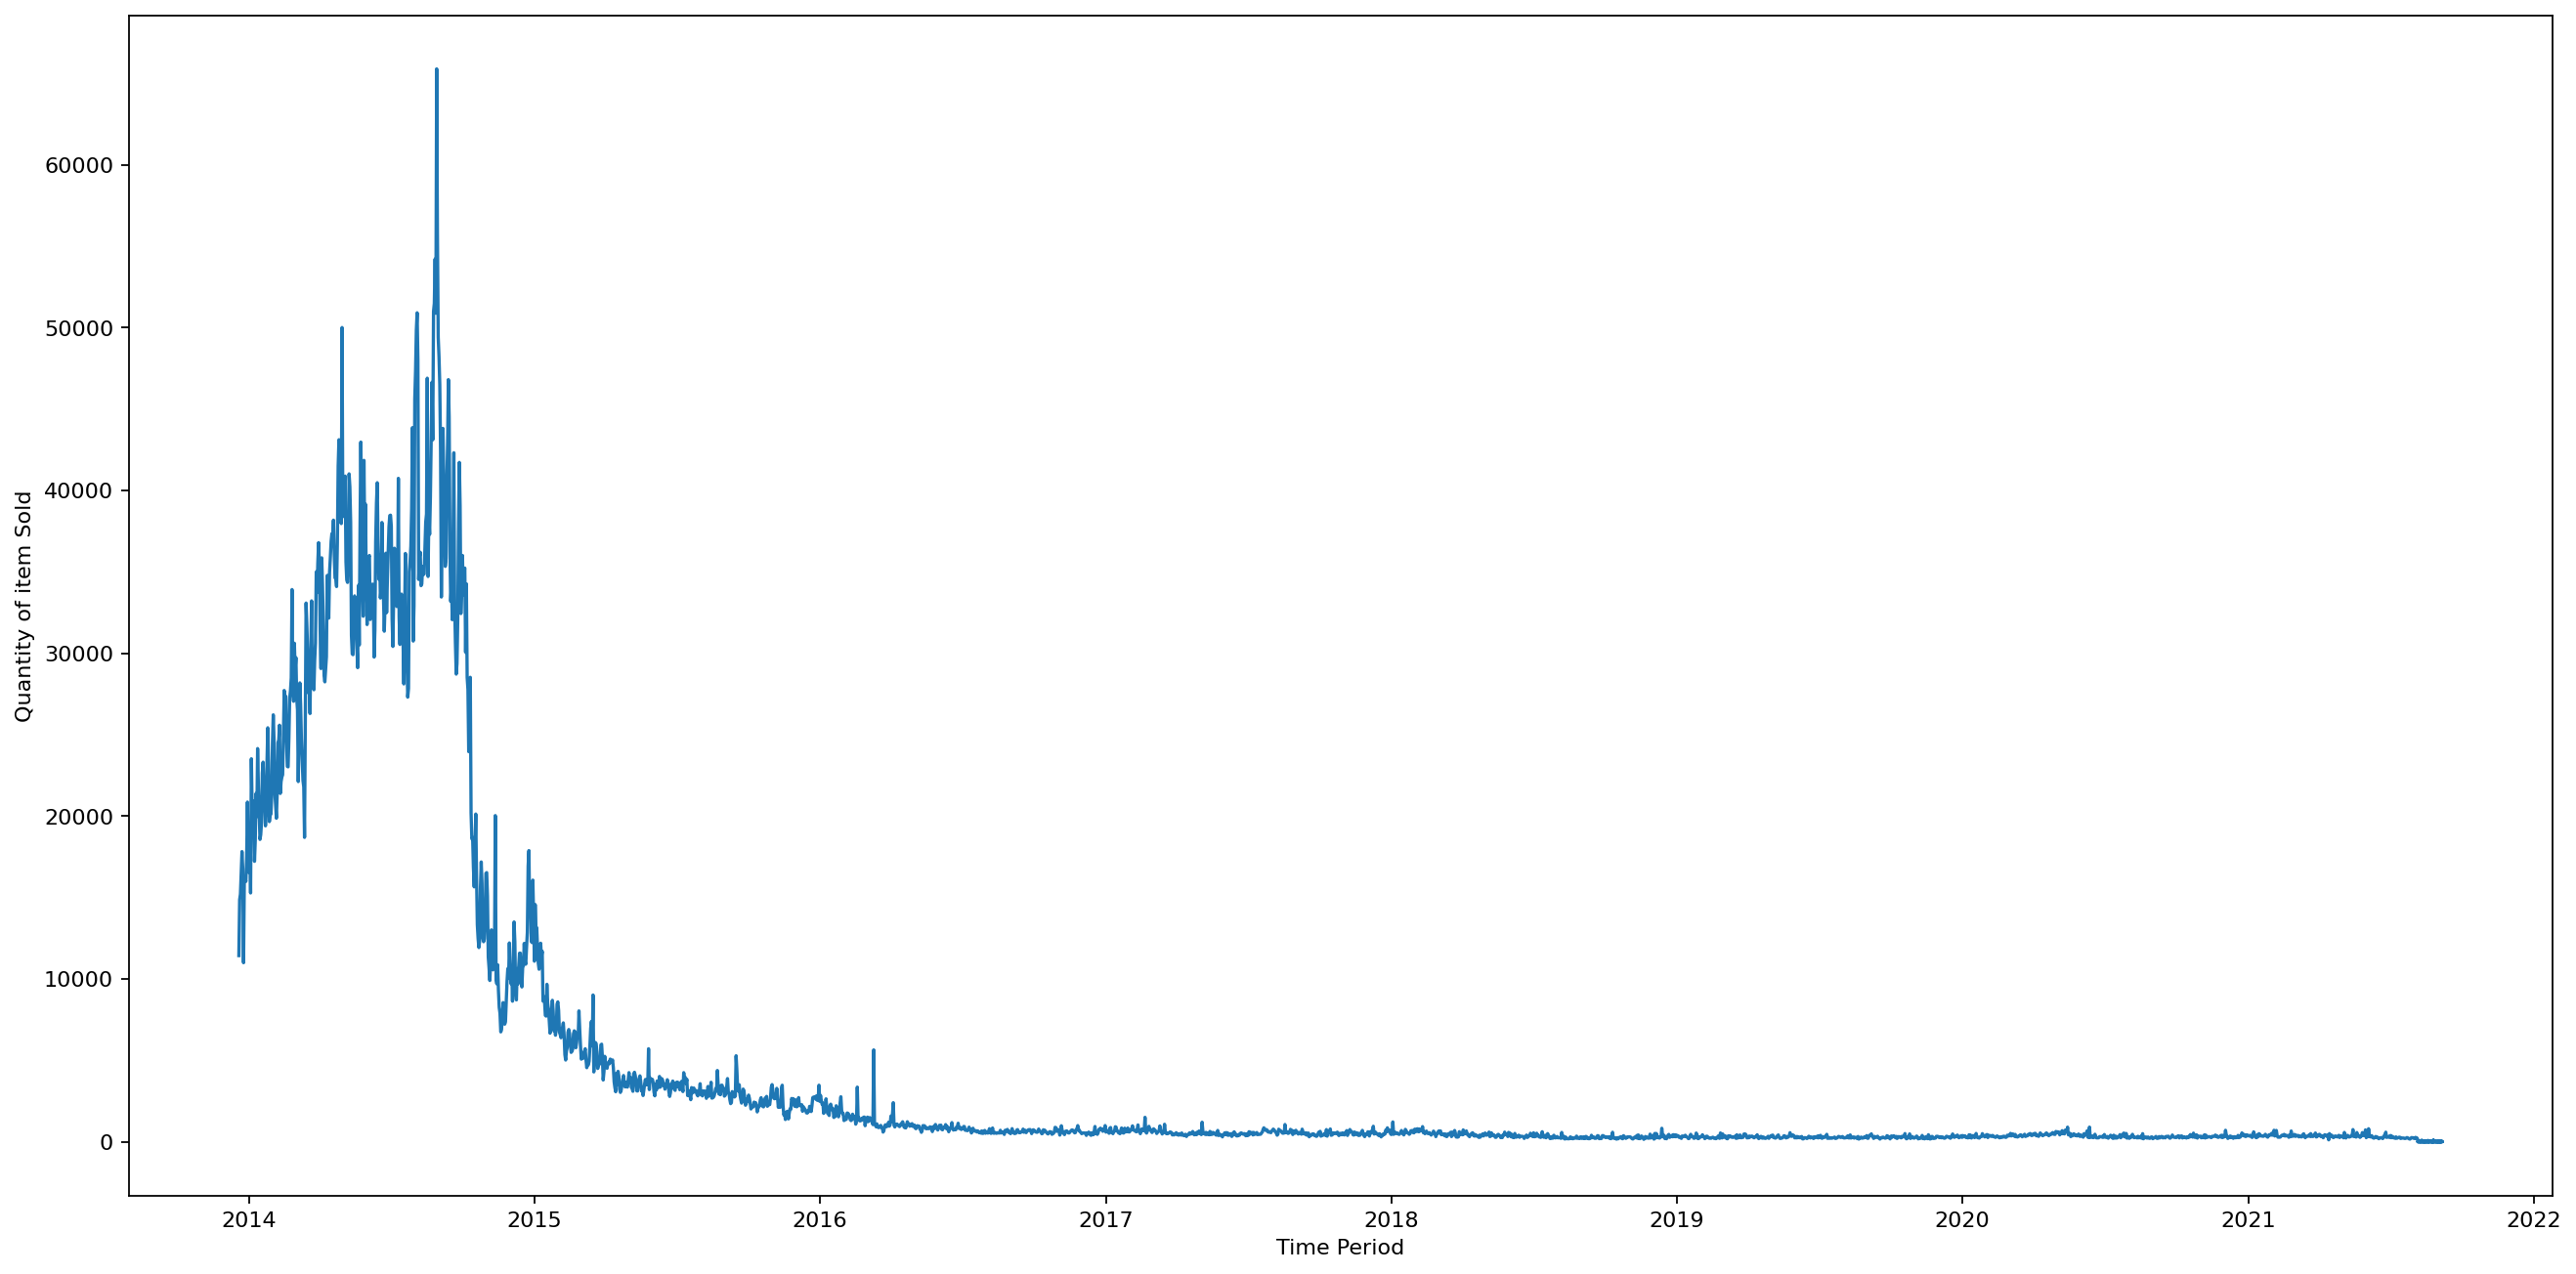

In [12]:
plt.figure(figsize=(20,10), dpi=160)
plt.xlabel('Time Period')
plt.ylabel('Quantity of item Sold')
plt.plot(item['Date'], item['Quatity Sold'])
plt.show()

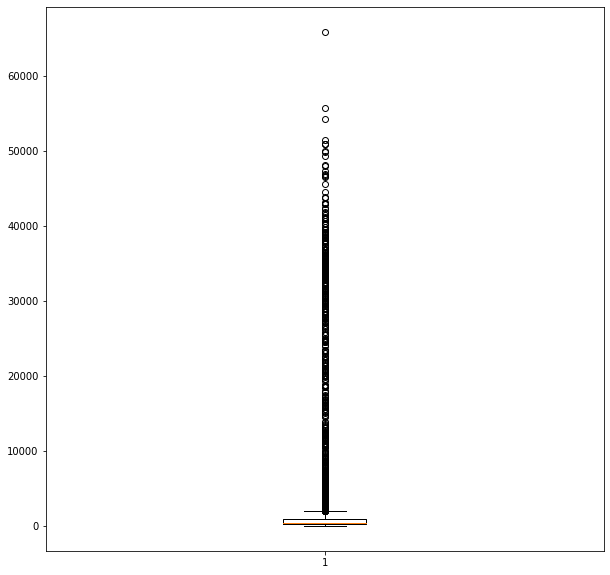

In [13]:
#box whisker's plot
#item.plot(kind='box', subplots=True, sharex=False, sharey=False)
fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(item['Quatity Sold'])
plt.show()
#ax.boxplot(item['Price'])
#plt.show()

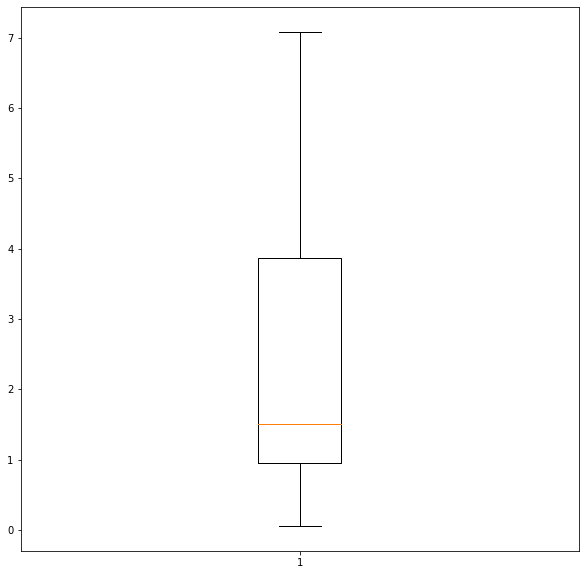

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(item['Price'])
plt.show()

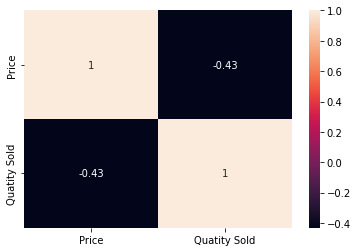

In [15]:
#corr matrix
cm=item.corr()
sns.heatmap(cm, annot=True)

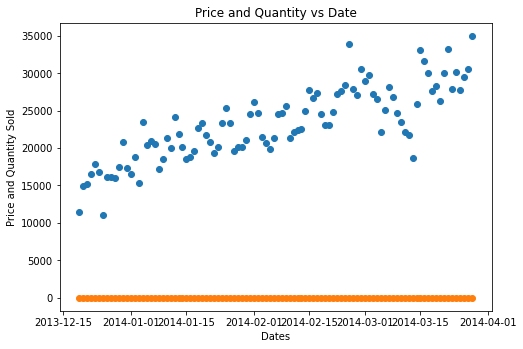

In [16]:
#scatter plot
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(item['Date'][:100], item['Quatity Sold'][:100])
ax.scatter(item['Date'][:100], item['Price'][:100])
ax.set_xlabel('Dates')
ax.set_ylabel('Price and Quantity Sold')
ax.set_title('Price and Quantity vs Date')
plt.show()

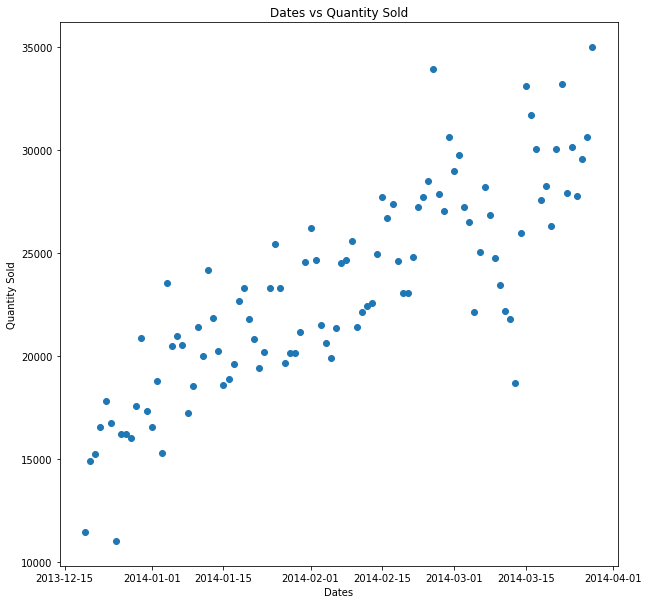

In [17]:
plt.figure(figsize=(10,10))
plt.xlabel('Dates')
plt.ylabel('Quantity Sold')
plt.title('Dates vs Quantity Sold')
plt.scatter(item['Date'][:100],item['Quatity Sold'][:100])
plt.show()

## Converting Dates into numerical data

In [18]:
item['Date'] = item['Date'].apply(lambda x :x.toordinal())
item.head()

,Date,Price,Quatity Sold
0,735221,6.930,11433
1,735222,4.273,14869
2,735223,3.352,15204
3,735224,2.689,16540
4,735225,2.353,17821


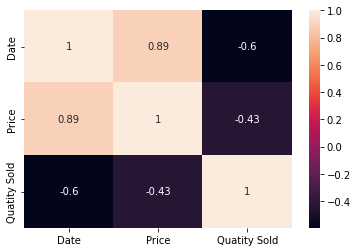

In [19]:
#corr matrix
cm=item.corr()
sns.heatmap(cm, annot=True)

##Fitting according to the dates and the prices
###Splitting of dataset

In [29]:
X=item[['Date']]
y=item['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Models

##Model 1 using price and date as y and x 

In [30]:
reg1=linear_model.LinearRegression()
reg1.fit(item[['Date']], item.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
reg1.predict([[datetime.strptime("2016-01-01", "%Y-%m-%d").toordinal()]])

array([0.71288695])

In [32]:
reg1.coef_

array([0.00149286])

In [33]:
reg1.intercept_

-1097.9777476324173

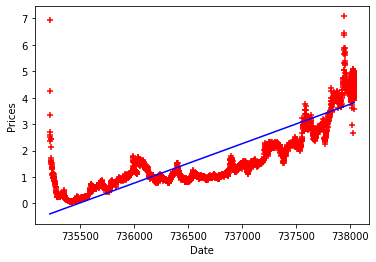

In [34]:
plt.xlabel('Date')
plt.ylabel('Prices')
plt.scatter(item.Date, item.Price, color='red', marker='+')
plt.plot(item.Date, reg1.predict(item[['Date']]), color='blue')

###Accuracy

In [35]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [36]:
test_pred = reg1.predict(X_test)
train_pred = reg1.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.5750563400269736
MSE: 0.4656467093517044
RMSE: 0.6823831103945235
R2 Square 0.8003748087921909
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.5812761224681038
MSE: 0.473279492136918
RMSE: 0.6879531176882027
R2 Square 0.7985573162140291
__________________________________


##Finding opti parameters function for further models

In [43]:
def findOptiPara(trainX, trainY, testX, testY):
  for i in range(1,10):
    poly = PolynomialFeatures(degree=i, include_bias=True)
    x_train_trans = poly.fit_transform(trainX)
    x_test_trans = poly.transform(testX)
    lr = LinearRegression()
    lr.fit(x_train_trans, trainY)
    y_pred = lr.predict(x_test_trans)
    print("degree="+ str(i) +" Accuracy="+str(metrics.r2_score(y_test, y_pred)))
    ##Plot graph
    x = poly.transform(X)
    lr = LinearRegression()
    lr.fit(x, y)
    z=lr.predict(x)
    plt.figure(i)
    plt.xlabel('Date')
    plt.ylabel('Prices')
    plt.scatter(item.Date, item.Price, color='red', marker='+') 
    plt.plot(item.Date, z, color='blue')



##Model 2 using quantity sold(x) and price(y)

In [37]:
X=item[['Quatity Sold']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=1, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

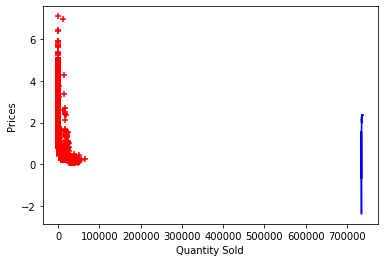

In [40]:
x_test_trans = poly.transform(X)
z=lr.predict(x_test_trans)
plt.xlabel('Quantity Sold')
plt.ylabel('Prices')
plt.scatter(item['Quatity Sold'], item.Price, color='red', marker='+')
plt.plot(item.Date, z, color='blue')

In [ ]:
findOptiPara(x_train, y_train, x_test, y_test)

hence we cannot select quantity sold as a feature to determine the price as best accuracy is only 38% approx.

##Model 3 Using polynomial regression using one variable (date)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [46]:
X=item[['Date']]
y=item['Price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [47]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

In [49]:
x_test_trans = poly.transform(X)
z=lr.predict(x_test_trans)

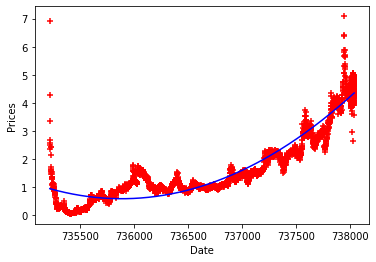

In [50]:
plt.xlabel('Date')
plt.ylabel('Prices')
plt.scatter(item.Date, item.Price, color='red', marker='+')
plt.plot(item.Date, z, color='blue')

##Finding optimal degree for regression

In [ ]:
findOptiPara(x_train, y_train, x_test, y_test)

#### Accuracy is almost constant for degree>=2. Hence we need take 2 here.

###Accuracy of selected model

In [52]:
x_test_trans=poly.fit_transform(x_test)
x_train_trans=poly.fit_transform(x_train)
test_pred = lr.predict(x_test_trans)
train_pred = lr.predict(x_train_trans)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.31253016749763435
MSE: 0.1740821804489144
RMSE: 0.4172315669372518
R2 Square 0.9283278887097559
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.31617689995950843
MSE: 0.17897749947750433
RMSE: 0.42305732410337055
R2 Square 0.9229574898604843
__________________________________


## function to predict the price of the item from our model

In [53]:
#@title Default title text
Enter_date = "2021-10-26" #@param {type:"date"}
date=list(map(int, Enter_date.split('-')))
date=dt.date(year=date[0], month=date[1], day=date[2])
date=date.toordinal()

###predicting on model 1 linear regression using only date and price as x and y attributes

In [54]:
def prediction1(date):
  return reg1.predict([[date]])
print(prediction1(date))

[3.88521277]


###predicting on model 2 polynomial regression model 

In [55]:
def prediction2(date):
  return lr.predict(poly.transform([[date]]))
print(prediction2(date))

[4.5301002]
